In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from data_set import encode_target
from sklearn.feature_selection import *

# to download these libraries
# open the terminal and type : pip install +library name

# example : pip install pandas


names = ["length", "width", "size", "conc", "conc1",
         "asym", "m3long", "m3trans", "alpha", "dist", "class"]

features =  ["length", "width", "size", "conc", "conc1",
         "asym", "m3long", "m3trans", "alpha", "dist"]

data = pd.read_csv('all_data.txt', names=names)

array = data.values
X = array[:,0:10]
Y = array[:,10]

data.head()

,length,width,size,conc,conc1,asym,m3long,m3trans,alpha,dist,class
0,27.4068,9.8829,2.3086,0.4177,0.2088,36.2978,18.8603,-6.7724,10.3529,192.2380,g
1,31.0340,12.8740,2.6474,0.4257,0.2196,9.2704,24.7180,-7.5406,6.3080,160.1350,g
2,61.5901,49.8072,3.6338,0.1920,0.1148,-33.1866,-76.6020,48.0003,84.7875,285.8583,h
3,20.6089,7.1467,2.1973,0.7365,0.3778,23.2209,11.4680,-5.8253,36.0741,129.0460,g
4,20.3722,12.9030,2.2844,0.4519,0.2312,-16.5144,-5.7444,7.3167,50.6061,175.8560,g


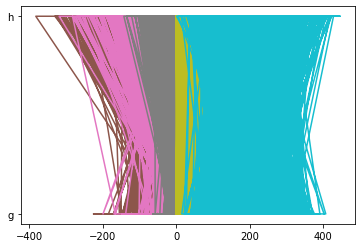

In [67]:
plt.plot(X,Y)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x011FECB0>,
      dtype=object)

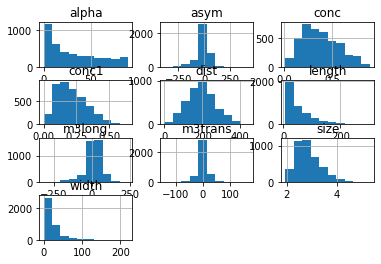

In [68]:
data.hist()

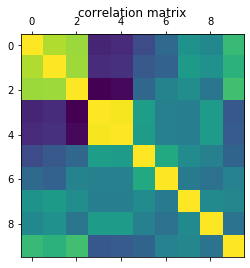

In [69]:
plt.matshow(data.corr())
plt.title('correlation matrix')
plt.show()

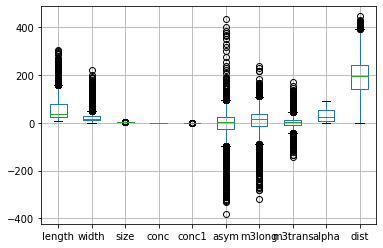

In [70]:
data.boxplot()
plt.show()

In [71]:
# feature selection using The Recursive Feature Elimination

# It uses the model accuracy to identify which attributes (and combination 
# of attributes) contribute the most to predicting the target attribute

# The classification algorithm below uses RFE with the logistic regression
# algorithm to select the top 3 features. The choice of algorithm does not 
# matter too much as long as it is skillful and consistent.

# separate classification from data
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# feature extraction
# could use any model of classification to calculate ranking
model = AdaBoostClassifier(n_estimators=30) 
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)

# features selected : length, width, size, alpha

Num Features: 4
Selected Features: [ True  True  True False False False False False  True False]
Feature Ranking: [1 1 1 7 2 6 3 4 1 5]


[0.12434857 0.09996688 0.10311124 0.06732762 0.06536738 0.06371754
 0.08006046 0.06025561 0.26719607 0.06864863]


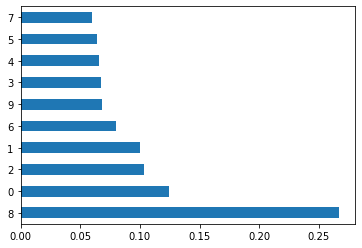

In [72]:
# feature selection using feature importance

# Bagged decision trees like Random Forest and Extra Trees
# can be used to estimate the importance of features.

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=1000)
model.fit(X, Y)
print(model.feature_importances_)

feature_importances = pd.Series(model.feature_importances_)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

# features selected : alpha, length, size, width

In [88]:
# making another train-test data based on feature selections

from sklearn.model_selection import train_test_split

data_elim = data.drop(columns=[ "asym" ])
data_elim = data_elim.drop(columns=[ "m3long"])
data_elim = data_elim.drop(columns=["m3trans"])
data_elim = data_elim.drop(columns=["dist"])
# data_elim = data_elim.drop(columns=["length"])
# data_elim = data_elim.drop(columns=["width"])
data_elim = data_elim.drop(columns=["conc"])
data_elim = data_elim.drop(columns=["conc1"])
array_e = data_elim.values
Xe = array_e[:,0:4]
Ye = array_e[:,4]

# splitting data into train-test 

Xe_train, Xe_test, ye_train, ye_test = train_test_split( Xe, Ye, test_size = 0.3, random_state = 100)

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

data_elim.head()

,length,width,size,alpha,class
0,27.4068,9.8829,2.3086,10.3529,g
1,31.0340,12.8740,2.6474,6.3080,g
2,61.5901,49.8072,3.6338,84.7875,h
3,20.6089,7.1467,2.1973,36.0741,g
4,20.3722,12.9030,2.2844,50.6061,g


In [93]:
# decision tree classification
import os
# put here the path to bin files of graphviz after you download it from
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


dt = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10) 
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dot_data = tree.export_graphviz(dt, out_file=None, class_names=True)
graph = graphviz.Source(dot_data)
graph.render("Decision tree")

print ("evaluation of decision tree without feature selection :")
print ("Accuracy:", accuracy_score(y_test, y_pred)*100)
print ("precision:", precision_score(y_test, y_pred, average="macro")*100)
print ("recall:", recall_score(y_test, y_pred, average="macro")*100)
print ("F-measure:", f1_score(y_test, y_pred, average="macro")*100)
print ("confusion matrix:")
print(confusion_matrix(y_test, y_pred)*100)
print()

dt = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10) 
dt.fit(Xe_train, ye_train)

ye_pred = dt.predict(Xe_test)

print ("evaluation of decision tree after feature selection :")
print ("Accuracy:", accuracy_score(ye_test, ye_pred)*100)
print ("precision:", precision_score(ye_test, ye_pred, average="macro")*100)
print ("recall:", recall_score(ye_test, ye_pred, average="macro")*100)
print ("F-measure:", f1_score(ye_test, ye_pred, average="macro")*100)
print ("confusion matrix:")
print(confusion_matrix(ye_test, ye_pred)*100)

dot_data = tree.export_graphviz(dt, out_file=None, class_names=True)
graph = graphviz.Source(dot_data)
graph.render("Decision tree with fs")

evaluation of decision tree without feature selection :
Accuracy: 78.7375415282392
precision: 78.95898596448201
recall: 78.67638129933212
F-measure: 78.6695012844362
confusion matrix:
[[50800 10200]
 [15400 44000]]

evaluation of decision tree after feature selection :
Accuracy: 78.82059800664452
precision: 78.95836979136284
recall: 78.77159573880886
F-measure: 78.77302233803731
confusion matrix:
[[50300 10700]
 [14800 44600]]


'Decision tree with fs.pdf'

finding best n without feature selection


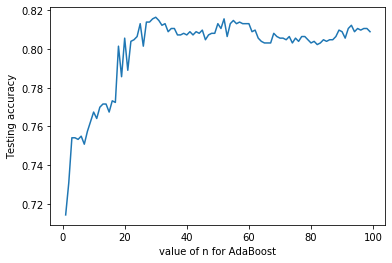

Highest score is at n = 30 equals : 0.8164451827242525

finding best n with feature selection


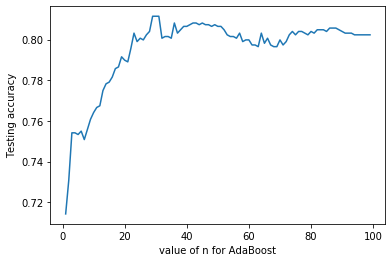

Highest score is at n = 29 equals : 0.8114617940199336


In [91]:
# AdaBoost classification
from sklearn.ensemble import AdaBoostClassifier
n_range = range(1,100)
scores_list = []

for n in n_range:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores_list.append(accuracy_score(y_test, y_pred))
print("finding best n without feature selection")
plt.plot(n_range, scores_list)
plt.xlabel("value of n for AdaBoost")
plt.ylabel("Testing accuracy")
plt.show()
best_n = scores_list.index(max(scores_list)) + 1
print("Highest score is at n =", best_n, "equals :"
      ,scores_list[scores_list.index(max(scores_list))])
print()

n_range_e = range(1,100)
scores_e_list = []
for n in n_range_e:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(Xe_train, ye_train)
    ye_pred = model.predict(Xe_test)
    scores_e_list.append(accuracy_score(ye_test, ye_pred))
print("finding best n with feature selection")    
plt.plot(n_range_e, scores_e_list)
plt.xlabel("value of n for AdaBoost")
plt.ylabel("Testing accuracy")
plt.show()
best_n_e = scores_e_list.index(max(scores_e_list)) + 1
print("Highest score is at n =", best_n_e, "equals :"
      ,scores_e_list[scores_e_list.index(max(scores_e_list))])

In [76]:

ada = AdaBoostClassifier(n_estimators=30)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print ("evaluation of AdaBoost(decision tree) without feature selection :")
print ("Accuracy:", accuracy_score(y_test, y_pred)*100)
print ("precision:", precision_score(y_test, y_pred, average="macro")*100)
print ("recall:", recall_score(y_test, y_pred, average="macro")*100)
print ("F-measure:", f1_score(y_test, y_pred, average="macro")*100)
print ("confusion matrix:")
print(confusion_matrix(y_test, y_pred)*100)
print()

ada = AdaBoostClassifier(n_estimators=29)
ada.fit(Xe_train, ye_train)
ye_pred = ada.predict(Xe_test)

print ("evaluation of AdaBoost after feature selection :")
print ("Accuracy:", accuracy_score(ye_test, ye_pred)*100)
print ("precision:", precision_score(ye_test, ye_pred, average="macro")*100)
print ("recall:", recall_score(ye_test, ye_pred, average="macro")*100)
print ("F-measure:", f1_score(ye_test, ye_pred, average="macro")*100)
print ("confusion matrix:")
print(confusion_matrix(ye_test, ye_pred)*100)

evaluation of AdaBoost(decision tree) without feature selection :
Accuracy: 81.64451827242524
precision: 81.6435018473909
recall: 81.64900369818402
F-measure: 81.64349256830639
confusion matrix:
[[49600 11400]
 [10700 48700]]

evaluation of AdaBoost after feature selection :
Accuracy: 81.22923588039868
precision: 81.22737306843266
recall: 81.23254401942927
F-measure: 81.22794091269085
confusion matrix:
[[49400 11600]
 [11000 48400]]


In [92]:
# logistic regression classification
from scipy.special import expit

model = LogisticRegression(solver="lbfgs", max_iter=1000) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print ("evaluation of logistic regression without feature selection :")
print ("Accuracy:", accuracy_score(y_test, y_pred)*100)
print ("precision:", precision_score(y_test, y_pred, average="macro")*100)
print ("recall:", recall_score(y_test, y_pred, average="macro")*100)
print ("F-measure:", f1_score(y_test, y_pred, average="macro")*100)
print ("confusion matrix:")
print(confusion_matrix(y_test, y_pred)*100)
print()

model = LogisticRegression(solver="lbfgs", max_iter=1000) 
model.fit(Xe_train, ye_train)
ye_pred = model.predict(Xe_test)

print ("evaluation of logistic regression after feature selection :")
print ("Accuracy:", accuracy_score(ye_test, ye_pred)*100)
print ("precision:", precision_score(ye_test, ye_pred, average="macro")*100)
print ("recall:", recall_score(ye_test, ye_pred, average="macro")*100)
print ("F-measure:", f1_score(ye_test, ye_pred, average="macro")*100)
print ("confusion matrix:")
print(confusion_matrix(ye_test, ye_pred)*100)

evaluation of logistic regression without feature selection :
Accuracy: 77.49169435215947
precision: 78.1145625292143
recall: 77.38946845504222
F-measure: 77.31919635254218
confusion matrix:
[[51900  9100]
 [18000 41400]]

evaluation of logistic regression after feature selection :
Accuracy: 76.99335548172758
precision: 77.49609995401754
recall: 76.89987304741403
F-measure: 76.84305103363613
confusion matrix:
[[51200  9800]
 [17900 41500]]


finding best K without feature selection


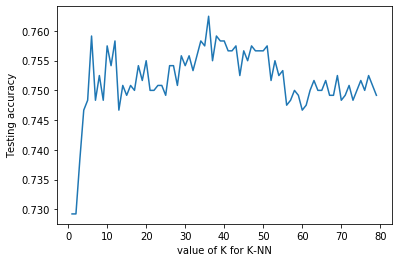

Highest score is at K = 36 equals : 0.7624584717607974

finding best K with feature selection


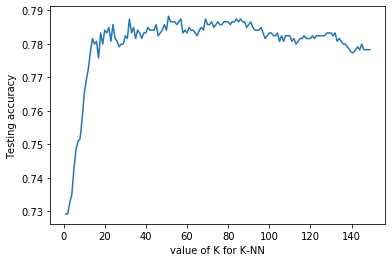

Highest score is at K = 51 equals : 0.7882059800664452


In [78]:
# K-neighbours classifier 
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,80)
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores_list.append(accuracy_score(y_test, y_pred))
print("finding best K without feature selection")
plt.plot(k_range, scores_list)
plt.xlabel("value of K for K-NN")
plt.ylabel("Testing accuracy")
plt.show()
best_k = scores_list.index(max(scores_list)) + 1
print("Highest score is at K =", best_k, "equals :"
      ,scores_list[scores_list.index(max(scores_list))])
print()

k_range_e = range(1,150)
scores_e_list = []
for k in k_range_e:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(Xe_train, ye_train)
    ye_pred = knn.predict(Xe_test)
    scores_e_list.append(accuracy_score(ye_test, ye_pred))
print("finding best K with feature selection")    
plt.plot(k_range_e, scores_e_list)
plt.xlabel("value of K for K-NN")
plt.ylabel("Testing accuracy")
plt.show()
best_k_e = scores_e_list.index(max(scores_e_list)) + 1
print("Highest score is at K =", best_k_e, "equals :"
      ,scores_e_list[scores_e_list.index(max(scores_e_list))])

In [79]:

model = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print ("evaluation of K-NN without feature selection :")
print ("Accuracy:", accuracy_score(y_test, y_pred)*100)
print ("precision:", precision_score(y_test, y_pred, average="macro")*100)
print ("recall:", recall_score(y_test, y_pred, average="macro")*100)
print ("F-measure:", f1_score(y_test, y_pred, average="macro")*100)
print ("confusion matrix:")
print(confusion_matrix(y_test, y_pred)*100)
print()

model = KNeighborsClassifier(n_neighbors=best_k_e, weights='distance')
model.fit(Xe_train, ye_train)
ye_pred = model.predict(Xe_test)

print ("evaluation of K-NN after feature selection :")
print ("Accuracy:", accuracy_score(ye_test, ye_pred)*100)
print ("precision:", precision_score(ye_test, ye_pred, average="macro")*100)
print ("recall:", recall_score(ye_test, ye_pred, average="macro")*100)
print ("F-measure:", f1_score(ye_test, ye_pred, average="macro")*100)
print ("confusion matrix:")
print(confusion_matrix(ye_test, ye_pred)*100)

evaluation of K-NN without feature selection :
Accuracy: 76.24584717607974
precision: 77.1590909090909
recall: 76.12021857923497
F-measure: 75.98281417830289
confusion matrix:
[[52200  8800]
 [19800 39600]]

evaluation of K-NN after feature selection :
Accuracy: 78.82059800664452
precision: 79.39176500820336
recall: 78.72523044654191
F-measure: 78.67642717988075
confusion matrix:
[[52400  8600]
 [16900 42500]]


In [80]:
# naive bayes classifier
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print ("evaluation of naive bayes without feature selection :")
print ("Accuracy:", accuracy_score(y_test, y_pred)*100)
print ("precision:", precision_score(y_test, y_pred, average="macro")*100)
print ("recall:", recall_score(y_test, y_pred, average="macro")*100)
print ("F-measure:", f1_score(y_test, y_pred, average="macro")*100)
print ("confusion matrix:")
print(confusion_matrix(y_test, y_pred)*100)
print()

model = GaussianNB() 
model.fit(Xe_train, ye_train)
ye_pred = model.predict(Xe_test)

print ("evaluation of naive bayes after feature selection :")
print ("Accuracy:", accuracy_score(ye_test, ye_pred)*100)
print ("precision:", precision_score(ye_test, ye_pred, average="macro")*100)
print ("recall:", recall_score(ye_test, ye_pred, average="macro")*100)
print ("F-measure:", f1_score(ye_test, ye_pred, average="macro")*100)
print ("confusion matrix:")
print(confusion_matrix(ye_test, ye_pred)*100)


evaluation of naive bayes without feature selection :
Accuracy: 63.87043189368771
precision: 69.06970585600847
recall: 63.51410277639786
F-measure: 60.87775924441652
confusion matrix:
[[55100  5900]
 [37600 21800]]

evaluation of naive bayes after feature selection :
Accuracy: 67.77408637873754
precision: 71.28249543452573
recall: 67.49682618535078
F-measure: 66.17223231173406
confusion matrix:
[[53900  7100]
 [31700 27700]]
